In [80]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Bengaluru_House_Data_edited.csv')

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
990,Super built-up Area,19-Jan,Mysore Road,2 BHK,NaN,1175,2.0,1.0,73.50
991,Built-up Area,Ready To Move,Hoodi,2 BHK,Goeur G,1425,2.0,2.0,80.00
992,Plot Area,Ready To Move,Chikkabanavar,1 Bedroom,NaN,1200,1.0,0.0,20.00
993,Plot Area,18-Aug,ITPL,3 Bedroom,NaN,1200,3.0,1.0,56.12


In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [30]:
df.dropna(inplace=True)

In [40]:
df["balcony"].value_counts()

1.0    234
2.0    230
3.0     71
0.0     42
Name: balcony, dtype: int64

In [91]:
list1=[int(i[0]) for i in df["size"]]

In [93]:
df["size"]=list1

In [137]:
listsqft=[]
for i in df["total_sqft"]:
    if "-" in i:
        listsqft.append(float(i[0:i.find(" ")]))
    else:
        listsqft.append(float(i))

In [140]:
df["total_sqft"]=listsqft

In [147]:
df["total_sqft"].nunique()

367

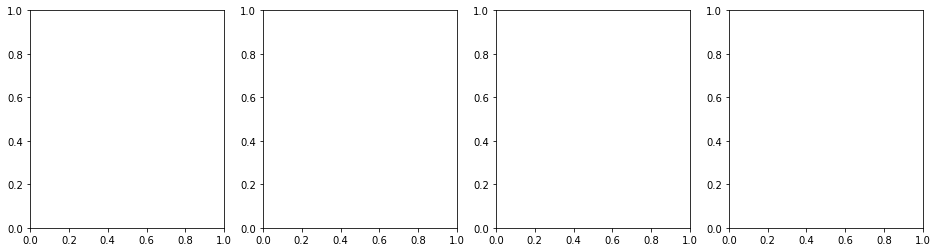

In [369]:
fig,axes=plt.subplots(figsize=(16,4),ncols=4)

In [370]:
axes[0].plot(np.sort(df["bath"].unique(), axis=-1, kind='quicksort', order=None),df.groupby("bath").median()["price"],marker="o",ls="--")
axes[0].set_xlabel("bath")
axes[0].set_ylabel("price")

Text(3.200000000000017, 0.5, 'price')

In [371]:
axes[1].plot([0,1,2,3],df.groupby("balcony").median()["price"],marker="o",ls="--")
axes[1].set_xlabel("no of balcony")

Text(0.5, 3.1999999999999993, 'no of balcony')

In [372]:
axes[2].plot([1, 2, 3, 4, 5, 9],df.groupby("size").mean()["price"],marker="o",ls="--")
axes[2].set_xlabel("no of bedrooms")

Text(0.5, 3.1999999999999993, 'no of bedrooms')

In [373]:
axes[3].plot(np.sort(df["total_sqft"].unique(), axis=-1, kind='quicksort', order=None),df.groupby("total_sqft").median()["price"],ls="--",lw="0.3")
axes[3].set_xlabel("total_sqft")

Text(0.5, 3.1999999999999993, 'total_sqft')

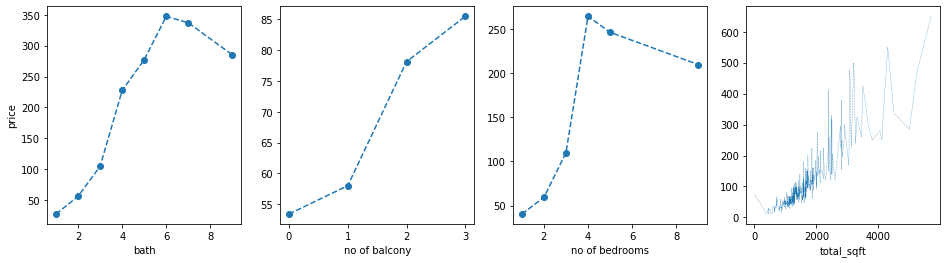

In [374]:
fig

In [116]:
np.sort(df["size"].unique(), axis=-1, kind='quicksort',order=None)

array([1, 2, 3, 4, 5, 9], dtype=int64)

In [117]:
df.groupby("size").median()

,bath,balcony,price
size,,,
1,1.0,1.0,28.35
2,2.0,1.0,53.50
3,3.0,2.0,95.00
4,4.0,2.0,247.00
5,5.0,2.0,213.00
9,9.0,3.0,210.00


In [178]:
fig.saveplot("graph.png")

AttributeError: 'Figure' object has no attribute 'saveplot'

In [182]:
fig.savefig('graph_housing.png')

In [189]:
df[df["total_sqft"]>30000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
672,Built-up Area,Ready To Move,Yelahanka,3,Edreelm,35000.0,3.0,3.0,130.0


In [190]:
df.drop(672,inplace=True)

In [192]:
df["cubed_total_sqft"]=np.array(df["total_sqft"])**3

In [193]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,cubed_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.070,1.177584e+09
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.000,1.757600e+10
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.000,3.518744e+09
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,38.000,1.601613e+09
11,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,295.000,2.160109e+10
...,...,...,...,...,...,...,...,...,...,...
985,Super built-up Area,18-Jul,Hosa Road,2,Mahesr,1161.0,2.0,1.0,55.150,1.564936e+09
986,Super built-up Area,Ready To Move,Sarjapur,1,DSousyl,645.0,1.0,0.0,17.535,2.683361e+08
989,Super built-up Area,Ready To Move,Yeshwanthpur,1,IBityin,665.0,1.0,1.0,36.850,2.940796e+08
991,Built-up Area,Ready To Move,Hoodi,2,Goeur G,1425.0,2.0,2.0,80.000,2.893641e+09


In [194]:
df["sqrt_size"]=np.sqrt(df["size"])

In [195]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,cubed_total_sqft,sqrt_size
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.070,1.177584e+09,1.414214
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.000,1.757600e+10,2.000000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.000,3.518744e+09,1.732051
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,38.000,1.601613e+09,1.414214
11,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,295.000,2.160109e+10,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
985,Super built-up Area,18-Jul,Hosa Road,2,Mahesr,1161.0,2.0,1.0,55.150,1.564936e+09,1.414214
986,Super built-up Area,Ready To Move,Sarjapur,1,DSousyl,645.0,1.0,0.0,17.535,2.683361e+08,1.000000
989,Super built-up Area,Ready To Move,Yeshwanthpur,1,IBityin,665.0,1.0,1.0,36.850,2.940796e+08,1.000000
991,Built-up Area,Ready To Move,Hoodi,2,Goeur G,1425.0,2.0,2.0,80.000,2.893641e+09,1.414214


In [201]:
df[r"$totalsqft^2$"]=np.array(df["total_sqft"])**2

In [202]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,cubed_total_sqft,sqrt_size,r$total_sqft^2$,$total_sqft^2$,$totalsqft^2$
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.070,1.177584e+09,1.414214,1115136.0,1115136.0,1115136.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.000,1.757600e+10,2.000000,6760000.0,6760000.0,6760000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.000,3.518744e+09,1.732051,2313441.0,2313441.0,2313441.0
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,38.000,1.601613e+09,1.414214,1368900.0,1368900.0,1368900.0
11,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,295.000,2.160109e+10,2.000000,7756225.0,7756225.0,7756225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Super built-up Area,18-Jul,Hosa Road,2,Mahesr,1161.0,2.0,1.0,55.150,1.564936e+09,1.414214,1347921.0,1347921.0,1347921.0
986,Super built-up Area,Ready To Move,Sarjapur,1,DSousyl,645.0,1.0,0.0,17.535,2.683361e+08,1.000000,416025.0,416025.0,416025.0
989,Super built-up Area,Ready To Move,Yeshwanthpur,1,IBityin,665.0,1.0,1.0,36.850,2.940796e+08,1.000000,442225.0,442225.0,442225.0
991,Built-up Area,Ready To Move,Hoodi,2,Goeur G,1425.0,2.0,2.0,80.000,2.893641e+09,1.414214,2030625.0,2030625.0,2030625.0


In [203]:
df.drop("r$total_sqft^2$",axis=1,inplace=True)

In [204]:
df.drop(r"$total_sqft^2$",axis=1,inplace=True)

In [224]:
df.reset_index(inplace=True)


In [225]:
df.drop("index",inplace=True,axis=1)

In [226]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,cubed_total_sqft,sqrt_size,$totalsqft^2$
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.070,1.177584e+09,1.414214,1115136.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.000,1.757600e+10,2.000000,6760000.0
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.000,3.518744e+09,1.732051,2313441.0
3,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,38.000,1.601613e+09,1.414214,1368900.0
4,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,295.000,2.160109e+10,2.000000,7756225.0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,Super built-up Area,18-Jul,Hosa Road,2,Mahesr,1161.0,2.0,1.0,55.150,1.564936e+09,1.414214,1347921.0
572,Super built-up Area,Ready To Move,Sarjapur,1,DSousyl,645.0,1.0,0.0,17.535,2.683361e+08,1.000000,416025.0
573,Super built-up Area,Ready To Move,Yeshwanthpur,1,IBityin,665.0,1.0,1.0,36.850,2.940796e+08,1.000000,442225.0
574,Built-up Area,Ready To Move,Hoodi,2,Goeur G,1425.0,2.0,2.0,80.000,2.893641e+09,1.414214,2030625.0


In [227]:
housing=pd.DataFrame()

In [228]:
housing

""


In [229]:
housing["x0"]=[1 for i in range(0,len(df))]

In [230]:
housing["bath"]=df["bath"].copy()

In [231]:
housing["balcony"]=df['balcony'].copy()

In [232]:
housing["size"]=df["size"].copy()

In [233]:
housing[r"$size^(0.5)$"]=df["sqrt_size"].copy()

In [238]:
housing

,x0,bath,balcony,size
0,1,2.0,1.0,2
1,1,5.0,3.0,4
2,1,3.0,1.0,3
3,1,2.0,1.0,2
4,1,5.0,3.0,4
...,...,...,...,...
571,1,2.0,1.0,2
572,1,1.0,0.0,1
573,1,1.0,1.0,1
574,1,2.0,2.0,2


In [311]:
housing["sqrt_size"]=np.array(df["size"])**2

In [312]:
housing

,x0,bath,balcony,size,sqrt_size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,2.0,1.0,2,4,1.056,1.115136,1.177584
1,1,5.0,3.0,4,16,2.600,6.760000,17.576000
2,1,3.0,1.0,3,9,1.521,2.313441,3.518744
3,1,2.0,1.0,2,4,1.170,1.368900,1.601613
4,1,5.0,3.0,4,16,2.785,7.756225,21.601087
...,...,...,...,...,...,...,...,...
571,1,2.0,1.0,2,4,1.161,1.347921,1.564936
572,1,1.0,0.0,1,1,0.645,0.416025,0.268336
573,1,1.0,1.0,1,1,0.665,0.442225,0.294080
574,1,2.0,2.0,2,4,1.425,2.030625,2.893641


In [241]:
housing["total_sqft"]=np.array(df["total_sqft"])/1000

In [242]:
housing['sq_total_sqft']=np.array(df[r"$totalsqft^2$"])/1000000

In [243]:
housing

,x0,bath,balcony,size,sqrt_size,total_sqft,sq_total_sqft
0,1,2.0,1.0,2,1.414214,1.056,1.115136
1,1,5.0,3.0,4,2.000000,2.600,6.760000
2,1,3.0,1.0,3,1.732051,1.521,2.313441
3,1,2.0,1.0,2,1.414214,1.170,1.368900
4,1,5.0,3.0,4,2.000000,2.785,7.756225
...,...,...,...,...,...,...,...
571,1,2.0,1.0,2,1.414214,1.161,1.347921
572,1,1.0,0.0,1,1.000000,0.645,0.416025
573,1,1.0,1.0,1,1.000000,0.665,0.442225
574,1,2.0,2.0,2,1.414214,1.425,2.030625


In [244]:
housing["cube_total_sqft"]=np.array(df["cubed_total_sqft"])/1000000000

In [245]:
housing

,x0,bath,balcony,size,sqrt_size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,2.0,1.0,2,1.414214,1.056,1.115136,1.177584
1,1,5.0,3.0,4,2.000000,2.600,6.760000,17.576000
2,1,3.0,1.0,3,1.732051,1.521,2.313441,3.518744
3,1,2.0,1.0,2,1.414214,1.170,1.368900,1.601613
4,1,5.0,3.0,4,2.000000,2.785,7.756225,21.601087
...,...,...,...,...,...,...,...,...
571,1,2.0,1.0,2,1.414214,1.161,1.347921,1.564936
572,1,1.0,0.0,1,1.000000,0.645,0.416025,0.268336
573,1,1.0,1.0,1,1.000000,0.665,0.442225,0.294080
574,1,2.0,2.0,2,1.414214,1.425,2.030625,2.893641


In [248]:
listy=[[i] for i in df['price']]


In [249]:
y=listy

In [251]:
len(y)

576

In [313]:
X=np.array(housing)

In [314]:
X

array([[ 1.        ,  2.        ,  1.        , ...,  1.056     ,
         1.115136  ,  1.17758362],
       [ 1.        ,  5.        ,  3.        , ...,  2.6       ,
         6.76      , 17.576     ],
       [ 1.        ,  3.        ,  1.        , ...,  1.521     ,
         2.313441  ,  3.51874376],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  0.665     ,
         0.442225  ,  0.29407963],
       [ 1.        ,  2.        ,  2.        , ...,  1.425     ,
         2.030625  ,  2.89364063],
       [ 1.        ,  2.        ,  2.        , ...,  1.255     ,
         1.575025  ,  1.97665637]])

In [316]:
Xt=X.T

In [317]:
housing

,x0,bath,balcony,size,sqrt_size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,2.0,1.0,2,4,1.056,1.115136,1.177584
1,1,5.0,3.0,4,16,2.600,6.760000,17.576000
2,1,3.0,1.0,3,9,1.521,2.313441,3.518744
3,1,2.0,1.0,2,4,1.170,1.368900,1.601613
4,1,5.0,3.0,4,16,2.785,7.756225,21.601087
...,...,...,...,...,...,...,...,...
571,1,2.0,1.0,2,4,1.161,1.347921,1.564936
572,1,1.0,0.0,1,1,0.645,0.416025,0.268336
573,1,1.0,1.0,1,1,0.665,0.442225,0.294080
574,1,2.0,2.0,2,4,1.425,2.030625,2.893641


In [318]:
inv=np.linalg.pinv(np.matmul(Xt,X))

In [319]:
one=np.matmul(inv,Xt)

In [320]:
theta=np.matmul(one,y)

In [321]:
theta

array([[-11.45868629],
       [  4.78128821],
       [ -5.99450764],
       [ 29.41042301],
       [ -5.63342513],
       [-22.71967326],
       [ 51.93475518],
       [ -5.966714  ]])

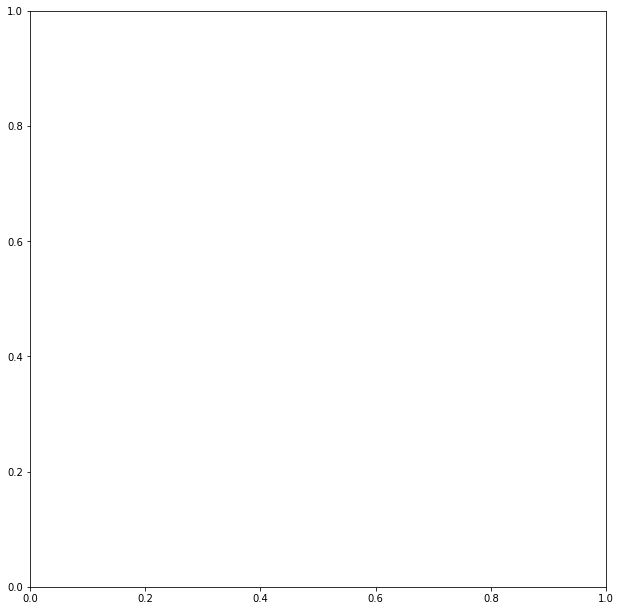

In [304]:
fig2=plt.figure(figsize=(8,8))
axes=fig2.add_axes([0,0,1,1])

In [305]:
listp=[(-20.1*i+53*(i**2)-6.3*(i**3)) for i in housing["total_sqft"]]

In [306]:
axes.plot(housing["total_sqft"],listp,ls=" ",marker="o",label="formed")

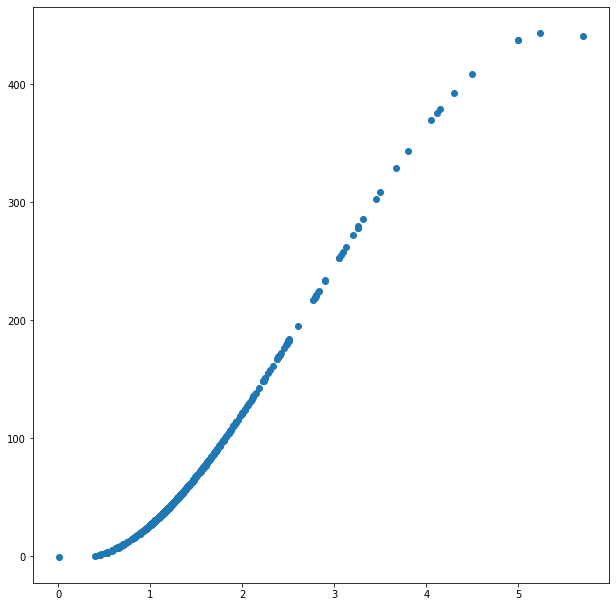

In [307]:
fig2

In [308]:
axes.plot(housing["total_sqft"],df["price"],ls=" ",marker="o",label="real")
axes.legend()

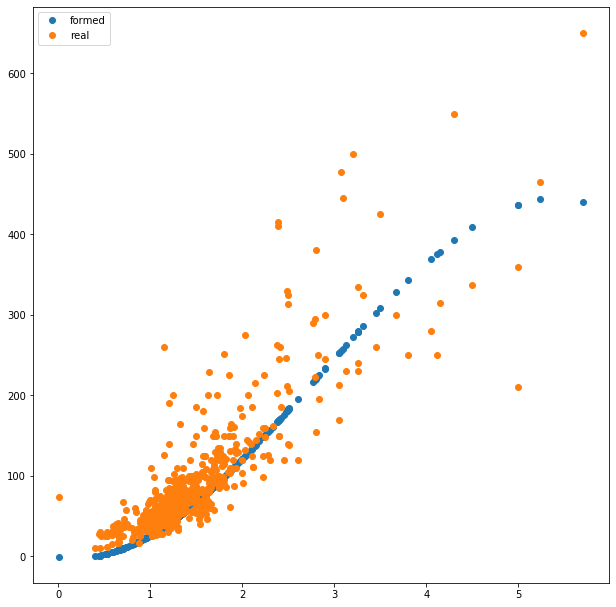

In [310]:
fig2


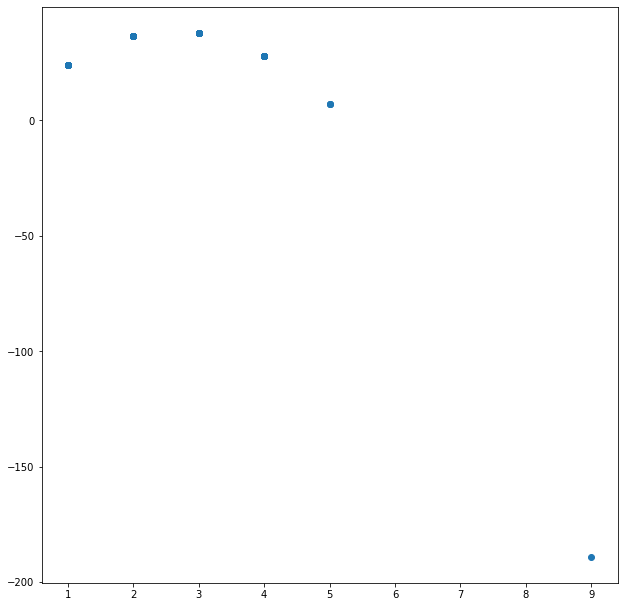

In [325]:
list2=[(29.4*i)+(-5.6*(i**2)) for i in housing["size"]]  #29.41042301    [ -5.63342513
fig3=plt.figure(figsize=(8,8))
ax=fig3.add_axes([0,0,1,1])
ax.plot(df["size"],list2,marker="o",ls=" ")
# ax.plot(df["size"],df["price"],marker="o",ls=" ")

In [326]:
housing2=housing.drop('sqrt_size',axis=1)

In [327]:
housing2

,x0,bath,balcony,size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,2.0,1.0,2,1.056,1.115136,1.177584
1,1,5.0,3.0,4,2.600,6.760000,17.576000
2,1,3.0,1.0,3,1.521,2.313441,3.518744
3,1,2.0,1.0,2,1.170,1.368900,1.601613
4,1,5.0,3.0,4,2.785,7.756225,21.601087
...,...,...,...,...,...,...,...
571,1,2.0,1.0,2,1.161,1.347921,1.564936
572,1,1.0,0.0,1,0.645,0.416025,0.268336
573,1,1.0,1.0,1,0.665,0.442225,0.294080
574,1,2.0,2.0,2,1.425,2.030625,2.893641


In [335]:
housing2["sqrt_size"]=np.sqrt(df['size']).copy()

In [336]:
housing2.drop("size",inplace=True,axis=1)

KeyError: "['size'] not found in axis"

In [337]:
housing2

,x0,bath,balcony,total_sqft,sq_total_sqft,cube_total_sqft,sqrt_size
0,1,2.0,1.0,1.056,1.115136,1.177584,1.414214
1,1,5.0,3.0,2.600,6.760000,17.576000,2.000000
2,1,3.0,1.0,1.521,2.313441,3.518744,1.732051
3,1,2.0,1.0,1.170,1.368900,1.601613,1.414214
4,1,5.0,3.0,2.785,7.756225,21.601087,2.000000
...,...,...,...,...,...,...,...
571,1,2.0,1.0,1.161,1.347921,1.564936,1.414214
572,1,1.0,0.0,0.645,0.416025,0.268336,1.000000
573,1,1.0,1.0,0.665,0.442225,0.294080,1.000000
574,1,2.0,2.0,1.425,2.030625,2.893641,1.414214


In [338]:
X1=np.array(housing2)

In [339]:
X1t=X1.T

In [340]:
inv=np.linalg.pinv(np.matmul(X1t,X1))

In [341]:
one1=np.matmul(inv,X1t)

In [344]:
theta1=np.matmul(one1,y)

In [345]:
theta1

array([[ 18.25908538],
       [  1.97638761],
       [ -5.95255666],
       [ 21.0200166 ],
       [ 38.96320471],
       [ -5.00989931],
       [-15.31003789]])

In [346]:
housing

,x0,bath,balcony,sqrt_size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,2.0,1.0,4,1.056,1.115136,1.177584
1,1,5.0,3.0,16,2.600,6.760000,17.576000
2,1,3.0,1.0,9,1.521,2.313441,3.518744
3,1,2.0,1.0,4,1.170,1.368900,1.601613
4,1,5.0,3.0,16,2.785,7.756225,21.601087
...,...,...,...,...,...,...,...
571,1,2.0,1.0,4,1.161,1.347921,1.564936
572,1,1.0,0.0,1,0.645,0.416025,0.268336
573,1,1.0,1.0,1,0.665,0.442225,0.294080
574,1,2.0,2.0,4,1.425,2.030625,2.893641


In [348]:
housing3=housing.drop(["total_sqft","sq_total_sqft"],axis=1)

In [349]:
housing3["sqrt_size"]=np.array(housing["sqrt_size"])**0.25

In [350]:
housing3

,x0,bath,balcony,sqrt_size,cube_total_sqft
0,1,2.0,1.0,1.414214,1.177584
1,1,5.0,3.0,2.000000,17.576000
2,1,3.0,1.0,1.732051,3.518744
3,1,2.0,1.0,1.414214,1.601613
4,1,5.0,3.0,2.000000,21.601087
...,...,...,...,...,...
571,1,2.0,1.0,1.414214,1.564936
572,1,1.0,0.0,1.000000,0.268336
573,1,1.0,1.0,1.000000,0.294080
574,1,2.0,2.0,1.414214,2.893641


In [351]:
X2=np.array(housing3)

In [352]:
X2t=X2.T

In [353]:
inv2=np.linalg.inv(np.matmul(X2t,X2))

In [354]:
one2=np.matmul(inv2,X2t)

In [355]:
theta2=np.matmul(one2,y)

In [366]:
theta2

array([[-67.62582972],
       [ 18.63675586],
       [ -3.2372878 ],
       [ 66.96289955],
       [  2.61168999]])

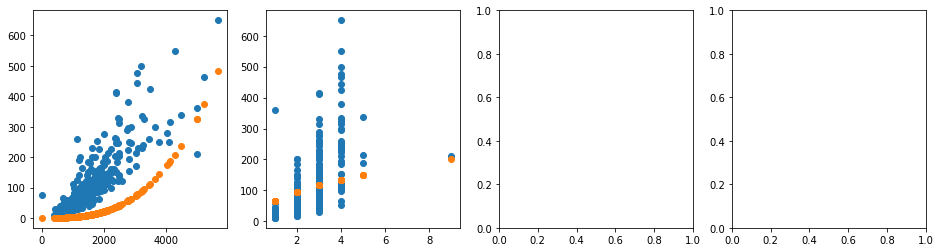

In [368]:
fig2,ax2=plt.subplots(figsize=(16,4),ncols=4)
ax2[0].plot(df["total_sqft"],y,label="real",marker="o",ls=" ")
ax2[0].plot(df["total_sqft"],[2.61*i for i in housing3["cube_total_sqft"]],marker="o",ls=" ")
ax2[1].plot(df["size"],y,marker="o",ls=" ")
ax2[1].plot(df['size'],[66.96*i for i in housing3["sqrt_size"]],marker="o",ls=" ")


In [375]:
housing3

,x0,bath,balcony,sqrt_size,cube_total_sqft
0,1,2.0,1.0,1.414214,1.177584
1,1,5.0,3.0,2.000000,17.576000
2,1,3.0,1.0,1.732051,3.518744
3,1,2.0,1.0,1.414214,1.601613
4,1,5.0,3.0,2.000000,21.601087
...,...,...,...,...,...
571,1,2.0,1.0,1.414214,1.564936
572,1,1.0,0.0,1.000000,0.268336
573,1,1.0,1.0,1.000000,0.294080
574,1,2.0,2.0,1.414214,2.893641


In [376]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,cubed_total_sqft,sqrt_size,$totalsqft^2$
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.070,1.177584e+09,1.414214,1115136.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.000,1.757600e+10,2.000000,6760000.0
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.000,3.518744e+09,1.732051,2313441.0
3,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,38.000,1.601613e+09,1.414214,1368900.0
4,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,295.000,2.160109e+10,2.000000,7756225.0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,Super built-up Area,18-Jul,Hosa Road,2,Mahesr,1161.0,2.0,1.0,55.150,1.564936e+09,1.414214,1347921.0
572,Super built-up Area,Ready To Move,Sarjapur,1,DSousyl,645.0,1.0,0.0,17.535,2.683361e+08,1.000000,416025.0
573,Super built-up Area,Ready To Move,Yeshwanthpur,1,IBityin,665.0,1.0,1.0,36.850,2.940796e+08,1.000000,442225.0
574,Built-up Area,Ready To Move,Hoodi,2,Goeur G,1425.0,2.0,2.0,80.000,2.893641e+09,1.414214,2030625.0


In [378]:
df.dropna(inplace=True)

In [379]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,cubed_total_sqft,sqrt_size,$totalsqft^2$
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.070,1.177584e+09,1.414214,1115136.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.000,1.757600e+10,2.000000,6760000.0
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.000,3.518744e+09,1.732051,2313441.0
3,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,38.000,1.601613e+09,1.414214,1368900.0
4,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,295.000,2.160109e+10,2.000000,7756225.0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,Super built-up Area,18-Jul,Hosa Road,2,Mahesr,1161.0,2.0,1.0,55.150,1.564936e+09,1.414214,1347921.0
572,Super built-up Area,Ready To Move,Sarjapur,1,DSousyl,645.0,1.0,0.0,17.535,2.683361e+08,1.000000,416025.0
573,Super built-up Area,Ready To Move,Yeshwanthpur,1,IBityin,665.0,1.0,1.0,36.850,2.940796e+08,1.000000,442225.0
574,Built-up Area,Ready To Move,Hoodi,2,Goeur G,1425.0,2.0,2.0,80.000,2.893641e+09,1.414214,2030625.0


In [380]:
house=pd.DataFrame()

In [381]:
house["x0"]=[1 for i in range(0,len(df))]

In [384]:
house["bath"]=df["bath"].copy()

In [385]:
house["balcony"]=df["balcony"].copy()

In [389]:
house["sq_size"]=np.sqrt(df["size"])

In [390]:
house

,x0,bath,balcony,sq_size
0,1,2.0,1.0,1.414214
1,1,5.0,3.0,2.000000
2,1,3.0,1.0,1.732051
3,1,2.0,1.0,1.414214
4,1,5.0,3.0,2.000000
...,...,...,...,...
571,1,2.0,1.0,1.414214
572,1,1.0,0.0,1.000000
573,1,1.0,1.0,1.000000
574,1,2.0,2.0,1.414214


In [391]:
house["total_sqft"]=np.array(df["total_sqft"])/1000

In [392]:
house["sq_total_sqft"]=(np.array(df["total_sqft"])**2)/1000000

In [393]:
house

,x0,bath,balcony,sq_size,total_sqft,sq_total_sqft
0,1,2.0,1.0,1.414214,1.056,1.115136
1,1,5.0,3.0,2.000000,2.600,6.760000
2,1,3.0,1.0,1.732051,1.521,2.313441
3,1,2.0,1.0,1.414214,1.170,1.368900
4,1,5.0,3.0,2.000000,2.785,7.756225
...,...,...,...,...,...,...
571,1,2.0,1.0,1.414214,1.161,1.347921
572,1,1.0,0.0,1.000000,0.645,0.416025
573,1,1.0,1.0,1.000000,0.665,0.442225
574,1,2.0,2.0,1.414214,1.425,2.030625


In [394]:
house["cube_total_sqft"]=(np.array(df["total_sqft"])**3)/1000000000

In [395]:
house

,x0,bath,balcony,sq_size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,2.0,1.0,1.414214,1.056,1.115136,1.177584
1,1,5.0,3.0,2.000000,2.600,6.760000,17.576000
2,1,3.0,1.0,1.732051,1.521,2.313441,3.518744
3,1,2.0,1.0,1.414214,1.170,1.368900,1.601613
4,1,5.0,3.0,2.000000,2.785,7.756225,21.601087
...,...,...,...,...,...,...,...
571,1,2.0,1.0,1.414214,1.161,1.347921,1.564936
572,1,1.0,0.0,1.000000,0.645,0.416025,0.268336
573,1,1.0,1.0,1.000000,0.665,0.442225,0.294080
574,1,2.0,2.0,1.414214,1.425,2.030625,2.893641


In [397]:
len(y)

576

In [398]:
X=np.array(house)

In [399]:
Xt=X.T

In [400]:
inv=np.linalg.pinv(np.matmul(Xt,X))

In [401]:
one=np.matmul(inv,Xt)

In [402]:
theta=np.matmul(one,y)

In [403]:
theta

array([[ 18.25908538],
       [  1.97638761],
       [ -5.95255666],
       [-15.31003789],
       [ 21.0200166 ],
       [ 38.96320471],
       [ -5.00989931]])

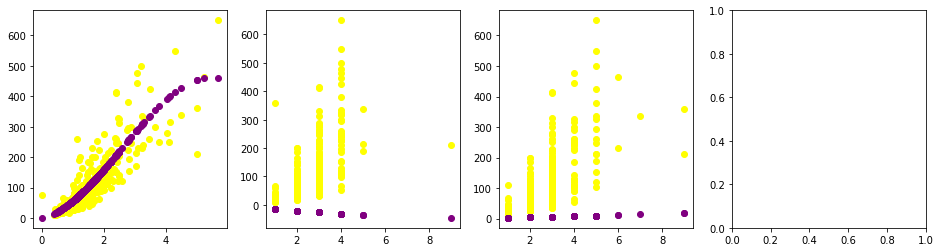

In [413]:
fig,ax=plt.subplots(figsize=(16,4),ncols=4)
ax[0].plot(house["total_sqft"],y,marker="o",ls=" ",color="yellow")
ax[0].plot(house["total_sqft"],[21*i+39*(i**2)-5*(i**3) for i in house["total_sqft"]],marker="o",ls=" ",color="purple")

ax[1].plot(df["size"],y,marker="o",ls=" ",color="yellow")
ax[1].plot(df["size"],[-15.3*i for i in house["sq_size"]],marker="o",ls=" ",color="purple")

ax[2].plot(df["bath"],y,marker="o",ls=" ",color="yellow")
ax[2].plot(house["bath"],[1.97*i for i in house["bath"]],marker="o",ls=" ",color="purple")

ax[3].plot(df["size"],y,marker="o",ls=" ",color="yellow")
ax[3].plot(df["size"],[-15.3*i for i in house["sq_size"]],marker="o",ls=" ",color="purple")

# through gradient descent

In [414]:
house

,x0,bath,balcony,sq_size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,2.0,1.0,1.414214,1.056,1.115136,1.177584
1,1,5.0,3.0,2.000000,2.600,6.760000,17.576000
2,1,3.0,1.0,1.732051,1.521,2.313441,3.518744
3,1,2.0,1.0,1.414214,1.170,1.368900,1.601613
4,1,5.0,3.0,2.000000,2.785,7.756225,21.601087
...,...,...,...,...,...,...,...
571,1,2.0,1.0,1.414214,1.161,1.347921,1.564936
572,1,1.0,0.0,1.000000,0.645,0.416025,0.268336
573,1,1.0,1.0,1.000000,0.665,0.442225,0.294080
574,1,2.0,2.0,1.414214,1.425,2.030625,2.893641


In [416]:
X[0]

array([1.        , 2.        , 1.        , 1.41421356, 1.056     ,
       1.115136  , 1.17758362])

In [500]:
def costfun(X,y,theta):
    j=0
    m,n=X.shape
    for i in range(0,m):
        j=j+((np.matmul(theta.T,X[i].reshape(n,1))-y[i])**2)/(2*m)
    return j

In [1]:
def diffarray(X,y,theta):
    m,n=X.shape
    list1=[]
    for j in range(0,n):
        x=0
        for i in range(0,m):
            x=x+((np.matmul(theta.T,X[i].reshape(n,1))-y[i])*X[i][j])/m
        list1.append(x)
#     print("derivative",np.array(list1).reshape(n,1))
    return np.array(list1).reshape(n,1)

In [595]:
def gradientdescent(X,y):
    m,n=X.shape
    a=0.1
    theta=np.array([0 for i in range(0,n)]).reshape(n,1)
    jprev=costfun(X,y,theta)
    jprev=float(jprev)
    print(jprev)
    counter=0
    rel=[]
    while True:
        temp=theta-a*diffarray(X,y,theta)
        theta=temp.reshape(n,1)
        j=costfun(X,y,theta)
        j=float(j)
        print(jprev-j)
        
        if jprev-j <= 0.01:
            print("final:",j)
            return theta
        else:
            jprev=j
            counter+=1
            if counter%100==0:
                list2.append([counter,j])
     
            
   

In [520]:
X.shape

(576, 7)

In [494]:
Y=np.array(y).reshape(576,1)

In [566]:
theta=gradientdescent(X,Y)


7483.759995182297


In [565]:
theta

array([[ 0.93109705],
       [ 2.80021337],
       [ 1.58773958],
       [ 1.56540984],
       [ 1.82711844],
       [ 4.53125   ],
       [14.10942052]])

In [529]:
int(costfun(X,Y,np.array([0,0,0,0,0,0,0]).reshape(7,1)))

7483

In [567]:
housing

,x0,bath,balcony,sqrt_size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,2.0,1.0,4,1.056,1.115136,1.177584
1,1,5.0,3.0,16,2.600,6.760000,17.576000
2,1,3.0,1.0,9,1.521,2.313441,3.518744
3,1,2.0,1.0,4,1.170,1.368900,1.601613
4,1,5.0,3.0,16,2.785,7.756225,21.601087
...,...,...,...,...,...,...,...
571,1,2.0,1.0,4,1.161,1.347921,1.564936
572,1,1.0,0.0,1,0.645,0.416025,0.268336
573,1,1.0,1.0,1,0.665,0.442225,0.294080
574,1,2.0,2.0,4,1.425,2.030625,2.893641


In [568]:
d=pd.DataFrame()

In [569]:
d["x0"]=housing["x0"].copy()

In [570]:
housing["bath"].max()-housing["bath"].min()

8.0

In [571]:
d["bath"]=np.array(housing["bath"])/8

In [574]:
d["balcony"]=np.array(housing["balcony"])/(housing["balcony"].max()-housing["balcony"].min())

In [582]:
d["sqrt_size"]=(np.array(housing["sqrt_size"])/(housing["sqrt_size"].max()-housing["sqrt_size"].min()))

In [585]:
d["total_sqft"]=(np.array(housing["total_sqft"])/(housing["total_sqft"].max()-housing["total_sqft"].min()))

In [586]:
d["sq_total_sqft"]=(np.array(housing["sq_total_sqft"])/(housing["sq_total_sqft"].max()-housing["sq_total_sqft"].min()))

In [587]:
d["cube_total_sqft"]=(np.array(housing["cube_total_sqft"])/(housing["cube_total_sqft"].max()-housing["cube_total_sqft"].min()))

In [588]:
d

,x0,bath,balcony,sqrt_size,total_sqft,sq_total_sqft,cube_total_sqft
0,1,0.250,0.333333,0.707107,0.185621,0.034323,0.006359
1,1,0.625,1.000000,1.000000,0.457022,0.208065,0.094906
2,1,0.375,0.333333,0.866025,0.267358,0.071205,0.019000
3,1,0.250,0.333333,0.707107,0.205660,0.042133,0.008648
4,1,0.625,1.000000,1.000000,0.489541,0.238727,0.116641
...,...,...,...,...,...,...,...
571,1,0.250,0.333333,0.707107,0.204078,0.041487,0.008450
572,1,0.125,0.000000,0.500000,0.113377,0.012805,0.001449
573,1,0.125,0.333333,0.500000,0.116892,0.013611,0.001588
574,1,0.250,0.666667,0.707107,0.250483,0.062500,0.015625


In [589]:
X=np.array(d)

In [590]:
X


array([[1.        , 0.25      , 0.33333333, ..., 0.18562137, 0.03432257,
        0.00635868],
       [1.        , 0.625     , 1.        , ..., 0.45702232, 0.20806479,
        0.0949064 ],
       [1.        , 0.375     , 0.33333333, ..., 0.26735806, 0.07120497,
        0.01900041],
       ...,
       [1.        , 0.125     , 0.33333333, ..., 0.11689225, 0.01361116,
        0.00158796],
       [1.        , 0.25      , 0.66666667, ..., 0.25048339, 0.06250023,
        0.015625  ],
       [1.        , 0.25      , 0.66666667, ..., 0.22060116, 0.0484774 ,
        0.01067349]])

In [591]:
Y

array([[ 39.07 ],
       [120.   ],
       [ 95.   ],
       [ 38.   ],
       [295.   ],
       [ 38.   ],
       [148.   ],
       [ 73.5  ],
       [ 48.   ],
       [ 60.   ],
       [290.   ],
       [122.   ],
       [380.   ],
       [ 25.25 ],
       [ 23.1  ],
       [ 48.77 ],
       [ 47.   ],
       [186.   ],
       [ 35.   ],
       [123.   ],
       [ 57.39 ],
       [ 36.   ],
       [125.   ],
       [ 38.   ],
       [ 38.   ],
       [ 91.79 ],
       [ 33.   ],
       [ 94.82 ],
       [ 50.   ],
       [ 99.   ],
       [ 91.   ],
       [ 75.   ],
       [ 75.   ],
       [ 44.   ],
       [185.   ],
       [ 55.   ],
       [650.   ],
       [ 44.   ],
       [ 43.   ],
       [ 80.58 ],
       [101.   ],
       [ 70.   ],
       [140.   ],
       [205.   ],
       [105.   ],
       [ 78.   ],
       [102.   ],
       [ 37.   ],
       [ 58.06 ],
       [ 70.   ],
       [ 80.   ],
       [245.   ],
       [138.   ],
       [ 17.   ],
       [150.   ],
       [ 4

In [596]:
theta=gradientdescent(X,Y)

7483.759995182297
1802.5179363110565
1134.4373237147101
715.5134379827869
452.8140760533506
288.069607944416
184.74426114108428
119.92965770939827
79.26196287531275
53.73487498945269
37.70133123848109
27.620552674674855
21.272426118146996
17.264911996613137
14.725183033339817
13.10596442521637
12.06410676465839
11.384449775738176
10.93208394506837
10.622417980097453
10.402410739212428
10.238803422031197
10.110741008760215
10.005145812251612
9.91381663843731
9.831609924363875
9.755299289370669
9.682860459666244
9.61302290720505
9.544988721662776
9.478256339688869
9.41251002084391
9.347550547664468
9.283251773605116
9.219533378005053
9.156343783080956
9.093649442520928
9.03142812529586
8.969664704401566
8.908348516295518
8.847471705150838
8.787028184619885
8.727012986736554
8.667421853651831
8.608250981528272
8.549496859898682
8.49115617089501
8.433225725968896
8.375702426124917
8.31858323698134
8.261865172991293
8.205545287535188
8.149620666593819
8.09408842478706
8.038945702718593
7.98

0.6196358504669206
0.6157898759092859
0.6119694299627554
0.6081743409397404
0.6044044383174878
0.600659552731031
0.5969395159675059
0.5932441609652415
0.5895733217914767
0.5859268336489549
0.5823045328531862
0.5787062568451802
0.5751318441573403
0.5715811344332451
0.5680539683939969
0.5645501878539108
0.5610696356977769
0.557612155877905
0.5541775934111683
0.5507657943596769
0.5473766058371439
0.5440098760007004
0.5406654540233831
0.5373431901196
0.5340429355107972
0.5307645424327347
0.5275078641197979
0.5242727548063613
0.5210590697206499
0.5178666650642754
0.5146953980161015
0.5115451267354274
0.5084157103244706
0.5053070088642926
0.5022188833609107
0.4991511957834973
0.4961038090245893
0.4930765869107745
0.4900693941951886
0.48708209654137136
0.4841145605269048
0.48116665363204447
0.47823824424176564
0.47532920161870607
0.47243939592931383
0.469568698204057
0.46671698035697773
0.46388411516431916
0.46106997626998236
0.45827443816324376
0.45549737619285224
0.45273866655111306
0.44999

0.07108037463137862
0.0708236747805131
0.07056855021676256
0.07031499060428814
0.07006298567819158
0.06981252523485182
0.06956359915125176
0.06931619735826189
0.0690703098632639
0.06882592673196086
0.0685830381003143
0.06834163417374839
0.06810170521600867
0.06786324155302736
0.06762623358667952
0.06739067177068137
0.06715654663116766
0.06692384874770596
0.0666925687727371
0.0664626974097473
0.06623422543520974
0.06600714367868932
0.06578144303466615
0.06555711445082579
0.06533414894670386
0.06511253759401825
0.06489227152337662
0.06467334192609542
0.06445574005306298
0.06423945720939628
0.06402448476410427
0.06381081413121592
0.06359843680002086
0.063387344300736
0.06317752822621969
0.06296898022389996
0.06276169199611559
0.06255565530307194
0.0623508619560198
0.062147303822371214
0.06194497282137945
0.061743860927549576
0.06154396017257113
0.06134526263167572
0.061147760442850085
0.06095144578500822
0.06075631090277511
0.06056234807738292
0.06036954965315999
0.06017790801695355
0.059

0.030566060540536455
0.030535070687960797
0.030504199375855023
0.03047344589617751
0.030442809547366778
0.03041228962945297
0.03038188545428966
0.03035159632838713
0.03032142157110229
0.03029136050258785
0.030261412444815505
0.030231576731353016
0.0302018526917891
0.03017223966730853
0.030142736999437147
0.030113344032542955
0.03008406011849729
0.030054884613946342
0.030025816876104727
0.02999685627025883
0.0299680021620361
0.029939253921270392
0.029910610929732684
0.02988207256134956
0.02985363820278053
0.029825307239320864
0.029797079065133403
0.029768953074949422
0.029740928666910804
0.02971300524995968
0.02968518222212424
0.029657459001555253
0.029629835004129745
0.029602309642200453
0.02957488234358152
0.029547552532108057
0.029520319641619608
0.02949318309811133
0.029466142348269386
0.02943919682536489
0.029412345979835663
0.029385589256094136
0.029358926104919192
0.029332355986298353
0.02930587835692222
0.029279492677915187
0.029253198415858606
0.029226995040971815
0.02920088202

0.02326789060828105
0.023256115782601228
0.02324435753087073
0.02323261579545033
0.02322089051574494
0.023209181636389076
0.02319748909746977
0.023185812837482445
0.023174152806518578
0.023162508938298743
0.023150881186325023
0.02313926948374956
0.023127673783164937
0.023116094021702338
0.02310453014865743
0.02309298210684574
0.023081449839310153
0.02306993329739271
0.023058432417769836
0.023046947155307862
0.023035477451117004
0.023024023252673942
0.023012584507682732
0.023001161163620054
0.022989753163756177
0.022978360463639547
0.022966983006654118
0.022955620738343896
0.022944273613234145
0.022932941574822507
0.022921624575815258
0.022910322566985997
0.022899035492855546
0.02288776330794917
0.022876505961221483
0.022865263403900826
0.022854035583350196
0.02284282245648228
0.022831623971683257
0.02282044007768036
0.022809270731499964
0.022798115884370418
0.022786975484109462
0.022775849490471956
0.022764737852526196
0.02275364052115947
0.0227425574555582
0.02273148860490437
0.022720

0.019499558586289822
0.01949178146799113
0.019484010816313457
0.01947624661897862
0.019468488869847533
0.019460737558006258
0.019452992672427172
0.01944525420390164
0.019437522143107344
0.019429796478789285
0.019422077205945243
0.019414364309568555
0.019406657781132708
0.01939895761529442
0.01939126379670597
0.019383576321047258
0.019375895172743185
0.01936822034974739
0.01936055183557528
0.019352889626361502
0.01934523371016894
0.019337584078357395
0.01932994072069505
0.019322303627745896
0.019314672793484533
0.019307048203472732
0.01929942985350408
0.01929181773084565
0.01928421182844886
0.01927661213653664
0.01926901864408137
0.019261431347899816
0.019253850230825265
0.019246275290811354
0.019238706515238846
0.01923114389512648
0.019223587424335165
0.019216037089563542
0.019208492887401007
0.019200954802840897
0.01919342283269998
0.019185896965154825
0.019178377192474727
0.019170863502836255
0.019163355892032996
0.019155854350970003
0.01914835886805122
0.019140869435659624
0.0191333

0.016823097687620248
0.01681733287705356
0.01681157201142014
0.016805815084467213
0.016800062091192558
0.01679431302670764
0.016788567885100747
0.016782826669214046
0.01677708936574618
0.016771355977880376
0.016765626498454367
0.016759900923148052
0.01675417924411704
0.01674846146465825
0.016742747578291528
0.016737037577854608
0.016731331459027388
0.016725629224765726
0.016719930860176646
0.016714236368329694
0.01670854574445002
0.01670285898228485
0.016697176080356257
0.016691497031615654
0.01668582183356193
0.016680150483125544
0.016674482972689475
0.01666881930202635
0.016663159466475008
0.016657503458986866
0.016651851277742935
0.016646202919901043
0.016640558377730486
0.016634917653050252
0.016629280733923224
0.016623647621372584
0.016618018313351968
0.016612392800880116
0.016606771082365412
0.01660115315269195
0.0165955390103818
0.016589928647363195
0.016584322063636137
0.016578719255221586
0.016573120212228787
0.01656752493863678
0.016561933423986375
0.01655634566839126
0.01655

0.014805925799805664
0.014801445965986204
0.014796968773339358
0.014792494213338614
0.01478802228814402
0.014783552992753357
0.014779086326143442
0.014774622285813166
0.014770160867215054
0.014765702070690168
0.014761245889189922
0.014756792325442802
0.014752341374219213
0.014747893033586479
0.014743447300133994
0.014739004174089132
0.014734563648630683
0.014730125724327081
0.014725690399359337
0.01472125766940735
0.014716827530378396
0.014712399983181967
0.014707975022020037
0.01470355265098533
0.014699132859391284
0.014694715649511636
0.014690301017026286
0.014685888960684679
0.014681479479349946
0.014677072564950322
0.014672668220441665
0.014668266442527056
0.014663867227000082
0.014659470572496502
0.014655076477538387
0.01465068493655508
0.014646295950797139
0.014641909515262341
0.014637525630064374
0.014633144287131472
0.014628765492261664
0.014624389236928437
0.014620015519653862
0.014615644340210565
0.01461127569564269
0.014606909580038518
0.014602545997036032
0.0145981849379950

0.013218501722803921
0.013214893287909035
0.013211286685987034
0.013207681913172564
0.013204078970147748
0.013200477856685211
0.013196878565281622
0.013193281101962384
0.01318968545797361
0.013186091636384845
0.01318249963458129
0.013178909450175524
0.013175321083622293
0.013171734528782508
0.013168149788953087
0.013164566860268678
0.01316098574204716
0.01315740642860419
0.013153828928466282
0.01315025322605834
0.013146679332635358
0.013143107239102392
0.01313953694511838
0.01313596845182019
0.013132401753409795
0.013128836850569314
0.013125273745004051
0.013121712429665422
0.013118152905008174
0.013114595170350185
0.013111039223986154
0.013107485059663304
0.013103932685680775
0.013100382092034124
0.01309683327951916
0.01309328624893169
0.013089740992768384
0.013086197517395703
0.013082655816219813
0.013079115886512227
0.013075577733047794
0.013072041345822072
0.01306850673097415
0.013064973881910191
0.013061442799880751
0.013057913481361538
0.013054385923737755
0.013050860132352682
0.

0.011920916363010292
0.011917922293264382
0.011914929537056196
0.011911938096545782
0.011908947964343497
0.011905959147043177
0.011902971635890935
0.011899985438617477
0.011897000546127856
0.011894016960354747
0.011891034681525525
0.011888053706911705
0.011885074038559651
0.011882095671012394
0.01187911860404256
0.011876142839582826
0.011873168373995213
0.011870195207620782
0.01186722333875423
0.01186425276648606
0.011861283489452035
0.011858315507424777
0.01185534881744843
0.011852383422137791
0.011849419316945387
0.01184645650391758
0.011843494977142655
0.011840534740827025
0.011837575790877963
0.011834618129341834
0.011831661750875355
0.011828706656615395
0.01182575284849463
0.01182280031866867
0.0118198490732766
0.011816899106065648
0.011813950419877983
0.011811003011985122
0.011808056878521711
0.011805112022557296
0.011802168443068695
0.011799226137213736
0.011796285103855553
0.011793345341857275
0.011790406853606328
0.011787469634327863
0.011784533684249254
0.01178159899950515
0.

0.010833405450171085
0.010830858126496423
0.010828311782120181
0.01082576641056221
0.010823222014209932
0.010820678590789612
0.010818136141438117
0.010815594663881711
0.010813054158120394
0.010810514623813106
0.01080797605754924
0.010805438465126826
0.010802901838133039
0.010800366181001664
0.010797831489639975
0.010795297767572265
0.010792765010705807
0.010790233218244794
0.010787702391894527
0.010785172528585463
0.010782643629568156
0.010780115693250991
0.010777588719406594
0.010775062704738048
0.010772537654474945
0.010770013560772895
0.010767490428179372
0.010764968254420637
0.010762447037677703
0.010759926777836881
0.010757407477399283
0.010754889130794254
0.010752371739272348
0.010749855302606193
0.010747339821250534
0.010744825291681082
0.010742311714352581
0.010739799089606095
0.010737287418123742
0.010734776694334869
0.010732266921195333
0.010729758098250386
0.010727250222771545
0.010724743296691486
0.010722237315007987
0.010719732283291705
0.010717228195858297
0.0107147250529

In [597]:
theta

array([[-33.0185943 ],
       [ 57.59450598],
       [-17.80153164],
       [ 23.3139792 ],
       [320.33630354],
       [185.4555934 ],
       [ 57.65843624]])

In [607]:
np.matmul(theta.reshape(1,7),X[8])

array([71.80512385])